In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

data_2016 = pd.read_csv('Resources/data/train.log_data_2016.csv')
data_2017 = pd.read_csv('Resources/data/test.log_data_2017.csv')

In [3]:
data = pd.concat([data_2016, data_2017], ignore_index=True)

C:\Users\johna\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
data.year.value_counts()

2016    241
2017    195
Name: year, dtype: int64

In [5]:
data = pd.get_dummies(data, columns=['production','rating'], drop_first = True)
data.head()

,box_office,country,genre,runtime,title,year,production_21 Laps Entertainment,production_A Day in the Life Films,production_A24,production_A24 Films,...,production_Wet Paint Production,production_Will Packer Productions,production_Working Title,production_XYZ Films,production_Yale Productions,rating_PG,rating_PG-13,rating_R,rating_TV-MA,rating_Unrated
0,1,1,3,133,Rogue One: A Star Wars Story,2016,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,4,97,Finding Dory,2016,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,3,147,Captain America: Civil War,2016,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,3,4,87,The Secret Life of Pets,2016,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2,4,106,The Jungle Book,2016,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
train = data.loc[data.year == 2016]
test = data.loc[data.year == 2017]

In [7]:
X_train = train[train.columns[~train.columns.isin(['box_office','title', 'year'])]]
y_train = train['box_office'].values.reshape(-1,1)

X_test = test[test.columns[~test.columns.isin(['box_office','title', 'year'])]]
y_test = test['box_office'].values.reshape(-1,1)

In [8]:
print(X_test.shape, y_test.shape)

(195, 199) (195, 1)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from scipy.special import expit

In [10]:
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
 classifier.fit(X_train, y_train)

C:\Users\johna\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\johna\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.91701244813278
Testing Data Score: 0.9025641025641026


ValueError: x and y must be the same size

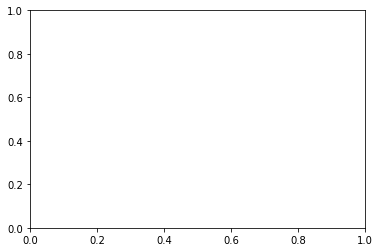

In [13]:
plt.scatter(X_test, y_test)